# Importing

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles

#import hdbscan
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
#import networkx as nx

import warnings
warnings.filterwarnings("ignore") 

In [2]:
cd ..

/Users/guglielmosanchini/PycharmProjects/Personal/ClustViz


In [3]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Generating Dataset

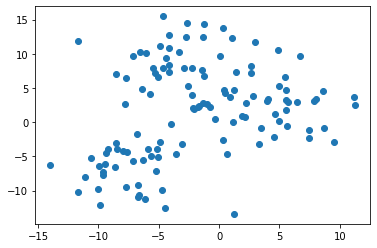

In [3]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=30, centers=4, n_features=2, cluster_std=1.8, random_state=42)

X1, y1 = make_moons(n_samples=80, noise=0.05, random_state=42)

varied = make_blobs(n_samples=120,
                             cluster_std=[3.5,3.5,3.5],
                             random_state=42)[0]
plt.scatter(varied[:,0], varied[:,1])
#plt.gcf().gca().add_artist(plt.Circle((-5, 0), 5, color="red", fill=False, linewidth=3, alpha=0.7))
plt.show()

# OPTICS

Cluster analysis method based on the OPTICS algorithm. OPTICS computes an augmented cluster-ordering of the database objects. The main advantage of our approach, when compared to the clustering algorithms proposed in the literature, is that we do not limit ourselves to one global parameter setting. Instead, the augmented cluster-ordering contains information which is equivalent to the density-based clusterings corresponding to a broad range of parameter settings and thus is a versatile basis for both automatic and interactive cluster analysis.

In [11]:
from clustviz.optics import OPTICS, plot_clust

#ClustDist, CoreDist = OPTICS(X, eps=2, minPTS=3, plot=True, plot_reach=True)

In [10]:
#ClustDist, CoreDist = OPTICS(X, eps=5, minPTS=3, plot=False, plot_reach=False)

In [8]:
#plot_clust(X, ClustDist, CoreDist, eps=2, eps_db=1.9)

In [9]:
#CoreDist

# DBSCAN

ADVANTAGES:

DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.

DBSCAN can find arbitrarily shaped clusters. It can even find a cluster completely surrounded by (but not connected to) a different cluster. Due to the MinPts parameter, the so-called single-link effect (different clusters being connected by a thin line of points) is reduced.

DBSCAN has a notion of noise, and is robust to outliers.

DBSCAN requires just two parameters and is mostly insensitive to the ordering of the points in the database. (However, points sitting on the edge of two different clusters might swap cluster membership if the ordering of the points is changed, and the cluster assignment is unique only up to isomorphism.)

DBSCAN is designed for use with databases that can accelerate region queries, e.g. using an R* tree.

The parameters minPts and ε can be set by a domain expert, if the data is well understood.

DISADVANTAGES:

DBSCAN is not entirely deterministic: border points that are reachable from more than one cluster can be part of either cluster, depending on the order the data are processed. For most data sets and domains, this situation does not arise often and has little impact on the clustering result: both on core points and noise points, DBSCAN is deterministic. DBSCAN* is a variation that treats border points as noise, and this way achieves a fully deterministic result as well as a more consistent statistical interpretation of density-connected components.

The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,ε). The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε. This effect, however, is also present in any other algorithm based on Euclidean distance.

DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters.

If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.

## Choosing eps

In [4]:
# we choose k as minPTS
k = 3
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.plot(distances)
#plt.xlabel("Points")
#plt.ylabel("Distances")
#plt.title("{0}-distance plot".format(k))
#plt.show()

#the best eps seems to be around 0.150, even if later we see that eps = 0.3 works better

## Testing

In [ ]:
from clustviz.dbscan import DBSCAN, plot_clust_DB
#ClustDict = DBSCAN(X, eps=3, minPTS=3, plotting=True)

In [10]:
#ClustDict = DBSCAN(X, eps=1.5, minPTS=3, plotting=False)

In [7]:
#plot_clust_DB(X, ClustDict, eps=1.5, noise_circle=True, circle_class="true")

# HDBSCAN

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html 

Density-based clustering is a popular clustering paradigm. However, the existing methods have a number of limitations: 

(i) Some methods (e.g., DBSCAN and DENCLUE ) can only provide a “flat” (i.e. non-hierarchical) labeling of the data objects, based on a global density threshold. Using a single density threshold can often not properly characterize common data sets with clusters of very different densities and/or nested clusters. 

(ii) Among the methods that provide a clustering hierarchy, some (e.g., gSkeletonClu) are not able to automatically simplify the hierarchy into an easily interpretable representation involving only the most significant clusters. 

(iii) Many hierarchical methods, including OPTICS and gSkeletonClu, suggest only how to extract a flat partition by using a global cut/density threshold, which may not result in the most significant clusters if these clusters are characterized by different density levels. 

(iv) Some methods are limited to specific classes of problems, such as networks (gSkeletonClu), and point sets in the real coordinate space (e.g., DECODE, and Generalized Single-Linkage). 

(v) Most methods depend on multiple, often critical input parameters.

In this paper, we propose a clustering approach that, to the best of our knowledge, is unique in that it does not suffer from any of these drawbacks. 
In detail, we make the following contributions: 

(i) We introduce a hierarchical clustering method, called HDBSCAN, which generates a complete density-based clustering hierarchy from which a simplified hierarchy composed only of the most significant clusters can be easily extracted. 

(ii) We propose a new measure of cluster stability for the purpose of extracting a set of significant clusters from possibly different levels of a simplified cluster tree produced by HDBSCAN. 

(iii) We formulate the task of extracting a set of significant clusters as an optimization problem in which the overall stability of the composing clusters is maximized. 

(iv) We propose an algorithm that finds the globally optimal solution to this problem. 

(v) We demonstrate the advancement in density-based clustering that our approach represents on a variety of real world data sets.

In [8]:
#!pip install hdbscan

In [4]:
# by default min_samples is set equal to min_cluster_size
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer.fit(X)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(location=None),
    metric='euclidean', min_cluster_size=3, min_samples=None, p=None,
    prediction_data=False)

In [15]:
# plt.figure(figsize = (18,8))
# clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
#                                       edge_alpha=0.6,
#                                       node_size=120,
#                                       edge_linewidth=3,
#                                       )

# xmin, xmax, ymin, ymax = plt.axis()
# xwidth = xmax - xmin
# ywidth = ymax - ymin

# xw1 = xwidth*0.015
# yw1 = ywidth*0

# xw2 = xwidth*0.01
# yw2 = ywidth*0

# for i, txt in enumerate([i for i in range(len(X))]):
#     if len(str(txt))==2:
#         plt.annotate(txt, (X[:,0][i]+xw1, X[:,1][i]-yw1), fontsize=12, size=12)
#     else:
#         plt.annotate(txt, (X[:,0][i]+xw2, X[:,1][i]-yw2), fontsize=12, size=12)


# plt.show()

In [ ]:
# distances in detail
dist_df = clusterer.minimum_spanning_tree_.to_pandas()
dist_df = dist_df.sort_values("distance", ascending=False)
dist_df
#they are processed in this order in the dendrogram below, starting from the whole data 
#and finishing with the single points
# in case of a tie in distances the splits must be executed simultaneously (as in 69 and 68 in the dist_df)

In [ ]:
#the scale is in log2, it proceeds from the top to the bottom

# plt.figure(figsize = (18,8))
# clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
# plt.show()

In [16]:
#Each row of the dataframe corresponds to an edge in the tree. 
#The parent and child are the ids of the parent and child nodes in the tree. 
#Node ids less than the number of points in the original dataset represent individual points, 
#while ids greater than the number of points are clusters.

#The lambda_val value is the value (1/distance) at which the child node
#leaves the cluster (1/distance of previous dataframe)

#The child_size is the number of points in the child node.

#clusterer.condensed_tree_.to_pandas()

In [14]:
# plt.figure(figsize = (18,8))
# clusterer.condensed_tree_.plot()
# clust_data = clusterer.condensed_tree_.get_plot_data()["cluster_bounds"]

# xmin, xmax, ymin, ymax = plt.axis()
# xwidth = xmax - xmin
# ywidth = ymax - ymin

# for name in list(clust_data.keys()):
#     data = clust_data[name]
#     x = (data[0] + data[1])/2 -xwidth*0.01
#     y = (data[3])-ywidth*0.04
#     plt.annotate("{0}".format(name), (x,y), fontsize=15, size=15, color="black")

# plt.show()

In [13]:
# plt.figure(figsize = (18,8))
# clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
# clust_data = clusterer.condensed_tree_.get_plot_data()["cluster_bounds"]

# xmin, xmax, ymin, ymax = plt.axis()
# xwidth = xmax - xmin
# ywidth = ymax - ymin

# for name in list(clust_data.keys()):
#     data = clust_data[name]
#     x = (data[0] + data[1])/2 -xwidth*0.01
#     y = (data[3])-ywidth*0.04
#     plt.annotate("{0}".format(name), (x,y), fontsize=15, size=15)
# plt.show()

In [33]:
#clusterer.labels_

In [34]:
#clusterer.probabilities_

In [35]:
#clusterer.outlier_scores_

In [12]:
# plt.figure(figsize=(18,8))
# palette = sns.color_palette()
# cluster_colors = [sns.desaturate(palette[col], sat)
#                   if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
#                   zip(clusterer.labels_, clusterer.probabilities_)]
# plt.scatter(X.T[0], X.T[1], c=cluster_colors, s=400, edgecolor="black")

# xmin, xmax, ymin, ymax = plt.axis()
# xwidth = xmax - xmin
# ywidth = ymax - ymin

# xw1 = xwidth*0.008
# yw1 = ywidth*0.008

# xw2 = xwidth*0.005
# yw2 = ywidth*0.008

# for i, txt in enumerate([i for i in range(len(X))]):
#     if len(str(txt))==2:
#         plt.annotate(txt, (X[:,0][i]-xw1, X[:,1][i]-yw1), fontsize=12, size=12)
#     else:
#         plt.annotate(txt, (X[:,0][i]-xw2, X[:,1][i]-yw2), fontsize=12, size=12)


# plt.show()

# SPECTRAL CLUSTERING

## Initial Discussion

http://people.csail.mit.edu/dsontag/courses/ml14/notes/Luxburg07_tutorial_spectral_clustering.pdf

The ε-neighborhood graph: Here we connect all points whose pairwise distances are smaller than ε. As the distances between all connected points are roughly of the same scale (at most ε), weighting the edges would not incorporate more information about the data to the graph. Hence, the ε-neighborhood graph is usually considered as an unweighted graph.

k-nearest neighbor graphs: Here the goal is to connect vertex vi with vertex vj if vj is among the k-nearest neighbors of vi. However, this definition leads to a directed graph, as the neighborhood relationship is not symmetric. There are two ways of making this graph undirected. The first way is to simply ignore the directions of the edges, that is we connect vi and vj with an undirected edge if vi is among the k-nearest neighbors of vj or if vj is among the k-nearest neighbors of vi. The resulting graph is what is usually called the k-nearest neighbor graph. The second choice is to connect vertices vi and vj if both vi is among the k-nearest neighbors of vj and vj is among the k-nearest neighbors of vi. The resulting graph is called the mutual k-nearest neighbor graph. In both cases, after connecting the appropriate vertices we weight the edges by the similarity of their endpoints.

The fully connected graph: Here we simply connect all points with positive similarity with each other, and we weight all edges by sij. As the graph should represent the local neighborhood relationships, this construction is only useful if the similarity function itself models local neighbor- hoods. An example for such a similarity function is the Gaussian similarity function s(xi,xj) = exp(−||xi −xj||^2/(2σ^2)), where the parameter σ controls the width of the neighborhoods. This parameter plays a similar role as the parameter ε in case of the ε-neighborhood graph.

The matrix L satisfies the following properties:
1. L is symmetric and positive semi-definite.
2. The smallest eigenvalue of L is 0, the corresponding eigenvector is the constant one vector . 
3. L has n non-negative, real-valued eigenvalues 0 = λ1 ≤ λ2 ≤ . . . ≤ λn .

Let G be an undirected graph with non-negative weights. Then the multiplicity k of the eigenvalue 0 of L equals the number of connected components A1, . . . , Ak in the graph. The eigenspace of eigenvalue 0 is spanned by the indicator vectors   A1 , . . . ,   Ak of those components.

$$L_{sym} := D^{−1/2} L D^{−1/2} = I − D^{−1/2} W D^{−1/2}$$

$$L_{rw} :=D^{−1} L = I − D^{−1} W. $$

The normalized Laplacians satisfy the following properties:
1. λ is an eigenvalue of L_rw with eigenvector u if and only if λ is an eigenvalue of L_sym with eigenvector w = D^1/2u.
2. λ is an eigenvalue of L_rw with eigenvector u if and only if λ and u solve the generalized eigenproblem Lu = λDu.
3. 0 is an eigenvalue of L_rw with the constant one vector as eigenvector. 0 is an eigenvalue of L_sym with eigenvector D^1/2 .
4. L_sym and L_rw are positive semi-definite and have n non-negative real-valued eigenvalues 0 = λ1 ≤...≤ λn.

Let $G$ be an undirected graph with non-negative weights. Then the multiplicity $k$ of the eigenvalue $0$ of both $L_{rw}$ and $L_{sym}$ equals the number of connected components $A_{1} , . . . , A_{k}$ in the graph. For $L_{rw}$ , the eigenspace of $0$ is spanned by the indicator vectors $1_{Ai}$ of those components. For $L_{sym}$, the eigenspace of $0$ is spanned by the vectors $D^{1/2} 1_{Ai}$ .

In [35]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
sns.set()

In [ ]:
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])
plt.figure(figsize=(10,3))
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b', s=250)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [38]:
W = pairwise_distances(X, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]]


In [39]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
    plt.show()

## First Example

GRAPH with a single connected component. We will observe a single null eigenvalue; the fact that the second smallest eigenvalue is big indicates that there is a single cluster

In [ ]:
G = nx.random_graphs.erdos_renyi_graph(10, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [44]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# Laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[8 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]
laplacian matrix:
[[ 8 -1 -1 -1  0 -1 -1 -1 -1 -1]
 [-1  4  0  0 -1  0  0 -1  0 -1]
 [-1  0  7 -1 -1 -1 -1 -1  0 -1]
 [-1  0 -1  4  0  0 -1  0  0 -1]
 [ 0 -1 -1  0  4  0 -1  0 -1  0]
 [-1  0 -1  0  0  4 -1  0 -1  0]
 [-1  0 -1 -1 -1 -1  8 -1 -1 -1]
 [-1 -1 -1  0  0  0 -1  5 -1  0]
 [-1  0  0  0 -1 -1 -1 -1  5  0]
 [-1 -1 -1 -1  0  0 -1  0  0  5]]


In [45]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[0.000 9.325 8.950 8.398 3.126 3.229 4.228 4.817 6.043 5.882]
eigenvectors:
[[0.316 0.664 -0.568 -0.319 0.072 0.046 0.152 0.025 -0.060 0.012]
 [0.316 -0.202 0.033 -0.105 -0.133 -0.641 0.365 -0.332 -0.260 -0.327]
 [0.316 -0.226 0.267 -0.728 0.101 0.084 -0.087 -0.003 0.471 0.032]
 [0.316 0.019 0.155 0.143 0.670 0.074 -0.292 0.185 -0.249 -0.468]
 [0.316 0.216 0.028 0.192 -0.421 -0.266 -0.724 -0.104 0.177 -0.037]
 [0.316 0.053 0.150 0.241 -0.187 0.625 0.210 -0.542 0.079 -0.217]
 [0.316 -0.623 -0.662 0.174 0.023 0.111 -0.076 0.079 0.088 0.105]
 [0.316 0.112 0.179 0.342 -0.158 -0.090 0.411 0.604 0.404 -0.092]
 [0.316 -0.098 0.221 -0.185 -0.358 0.241 -0.036 0.341 -0.660 0.260]
 [0.316 0.085 0.196 0.246 0.391 -0.184 0.079 -0.253 0.010 0.733]]


In [ ]:
fig = plt.figure(figsize=(12,3))
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0] #very low #1st column
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

## Second Example

GRAPH with two cluster. We will observe two null eigenvalues, so two clusters, since the third eigenvalue is pretty high

In [ ]:
G = nx.Graph()
G.add_edges_from([
    [1, 2], [1, 3], [1, 4], [2, 3], [2, 7], [3, 4], [4, 7], [1, 7],
    [6, 5], [5, 8], [6, 8], [9, 8], [9, 6]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
#print(W.todense())

In [48]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
#print('degree matrix:')
#print(D)
# laplacian matrix
L = D - W
#print('laplacian matrix:')
#print(L)
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.000 0.000 5.000 3.000 3.000 4.000 0.000 4.000 2.000]
eigenvectors:
[[0.894 -0.447 0.077 0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 0.707 0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 -0.000 -0.588 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 0.479 -0.707 -0.392 0.000 0.000 0.000 0.000]
 [-0.224 -0.447 -0.517 0.000 0.588 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.866 -0.500 -0.154 0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.350 -0.707]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 0.855 -0.000]
 [0.000 0.000 0.000 0.000 0.000 -0.289 -0.500 -0.350 0.707]]


In [ ]:
fig = plt.figure(figsize=[18, 3])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0] #(array([1, 6]),)
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]]) #2nd column
ax2.title.set_text('first eigenvector with eigenvalue of 0')
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]]) #7th column
ax3.title.set_text('second eigenvector with eigenvalue of 0')
plt.show()

In [ ]:
new_mat = np.concatenate([v[:, i[0]], v[:, i[1]]], axis=1)

plt.scatter(np.array(new_mat.T[0])[0], np.array(new_mat.T[1])[0], alpha=0.5, s=400)
plt.show()

km = KMeans(init='k-means++', n_clusters=2)
km.fit(new_mat)
print(km.labels_)

Alternative way with $ L_{sym} $

In [51]:
D_pow = scipy.linalg.fractional_matrix_power(D,-0.5)

L_norm = np.matmul(np.matmul(D_pow, L), D_pow)

In [52]:
e, v = np.linalg.eig(L_norm)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[1.333 0.000 1.000 1.667 1.000 -0.000 1.333 1.667 1.000]
eigenvectors:
[[0.866 -0.500 0.000 -0.000 0.000 0.000 0.000 0.000 0.000]
 [-0.250 -0.433 -0.707 0.500 -0.333 0.000 0.000 0.000 0.000]
 [-0.250 -0.433 -0.000 -0.500 -0.624 0.000 0.000 0.000 0.000]
 [-0.250 -0.433 0.707 0.500 0.333 0.000 0.000 0.000 0.000]
 [-0.250 -0.433 -0.000 -0.500 0.624 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.548 0.707 -0.447 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.447 -0.000 0.548 -0.707]
 [0.000 0.000 0.000 0.000 0.000 0.548 -0.707 -0.447 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.447 0.000 0.548 0.707]]


In [53]:
i = np.where(e < 10e-6)[0] #(array([1, 6]),)
print(i)
new_mat = np.concatenate([v[:, i[0]], v[:, i[1]]], axis=1)

[1 5]


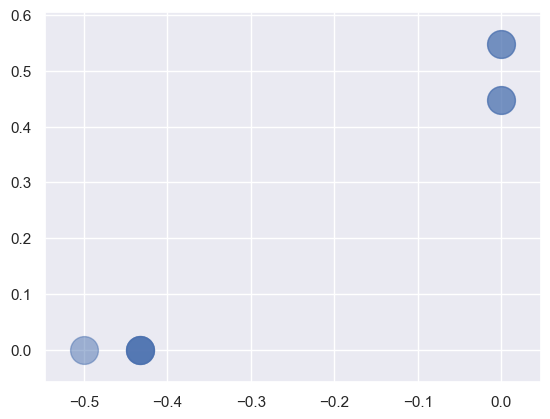

In [54]:
plt.scatter(np.array(new_mat.T[0])[0], np.array(new_mat.T[1])[0], alpha=0.5, s=400)
plt.show()

In [55]:
km = KMeans(init='k-means++', n_clusters=2)
km.fit(new_mat)
km.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

## Third Example

GRAPH with only one connected component, but with two visible clusters; we will observe a null eigenvalue, but the second and third smallest are also close to zero, so one can choose k=2 or k=3

In [ ]:
G = nx.Graph()
G.add_edges_from([
    [1, 2], [1, 3], [1, 4], [2, 3],
    [3, 4], [4, 5], [1, 5], [6, 7],
    [7, 8], [6, 8], [6, 9], [9, 6], [7, 10], [7, 2]
])
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [64]:
D = np.diag(np.sum(np.array(W.todense()), axis=1))
L = D - W
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[5.485 4.898 4.398 3.801 3.155 -0.000 0.229 0.728 1.913 1.393]
eigenvectors:
[[-0.430 0.773 -0.021 0.068 -0.049 -0.316 -0.320 -0.047 -0.078 0.011]
 [0.478 -0.014 0.232 0.123 -0.532 -0.316 -0.154 0.054 -0.525 -0.130]
 [-0.092 -0.345 -0.592 0.021 0.378 -0.316 -0.303 -0.032 -0.430 -0.033]
 [0.181 -0.104 0.616 -0.207 0.522 -0.316 -0.364 -0.078 0.136 0.066]
 [0.071 -0.231 -0.248 0.077 -0.410 -0.316 -0.387 -0.099 0.656 0.127]
 [0.240 0.203 -0.244 -0.744 -0.028 -0.316 0.338 -0.164 0.083 -0.199]
 [-0.666 -0.401 0.288 -0.187 -0.246 -0.316 0.196 0.201 -0.062 -0.187]
 [0.122 0.068 -0.018 0.517 0.238 -0.316 0.301 0.029 0.244 -0.636]
 [-0.054 -0.052 0.072 0.266 0.013 -0.316 0.438 -0.603 -0.091 0.505]
 [0.148 0.103 -0.085 0.067 0.114 -0.316 0.254 0.739 0.068 0.476]]


In [ ]:
fig = plt.figure(figsize=[18, 3])
ax1 = plt.subplot(131)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.8)[0]
ax2 = plt.subplot(132)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(133)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
plt.show()

In [ ]:
new_mat = np.concatenate([v[:, i[0]], v[:, i[1]]], axis=1)

plt.scatter(np.array(new_mat.T[0])[0], np.array(new_mat.T[1])[0], alpha=0.5, s=400)
plt.show()

km = KMeans(init='k-means++', n_clusters=2)
km.fit(new_mat)
print(km.labels_)

In [ ]:
new_mat = np.concatenate([v[:, i[0]], v[:, i[1]], v[:,i[2]]], axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(new_mat.T[0])[0], np.array(new_mat.T[1])[0],np.array(new_mat.T[2])[0], alpha=0.5, s=400)
plt.show()

km = KMeans(init='k-means++', n_clusters=3, random_state=42)
km.fit(new_mat)
print(km.labels_)

## Fourth Example

GRAPH with one single connected component, but with 3 or 4 visible clusters, therefore we try with k=3 and k=4 

In [ ]:
G = nx.Graph()
G.add_edges_from([
    [1, 2], [1, 3], [1, 4], [2, 3], [3, 4], [4, 5],
    [1, 5], [6, 7], [7, 8], [6, 8], [6, 9], [9, 6],
    [7, 10], [7, 2], [11, 12], [12, 13], [7, 12],
    [11, 13]
])

draw_graph(G)
W = nx.adjacency_matrix(G)
#print(W.todense())

In [77]:
D = np.diag(np.sum(np.array(W.todense()), axis=1))
L = D - W
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[6.333 5.020 4.471 3.862 3.535 3.138 1.915 -0.000 0.184 0.348 0.772 1.421
 3.000]
eigenvectors:
[[0.136 -0.867 0.086 -0.015 0.092 0.040 -0.079 -0.277 0.347 0.078 0.040
  -0.009 -0.000]
 [-0.312 0.253 0.318 -0.023 0.299 0.482 -0.527 -0.277 0.205 0.014 -0.054
  0.127 -0.000]
 [0.070 0.189 -0.667 -0.008 -0.073 -0.355 -0.434 -0.277 0.333 0.071 0.025
  0.035 0.000]
 [-0.056 0.231 0.577 0.044 -0.352 -0.473 0.135 -0.277 0.384 0.096 0.069
  -0.062 -0.000]
 [-0.018 0.211 -0.269 -0.016 0.169 0.380 0.661 -0.277 0.403 0.106 0.089
  -0.124 -0.000]
 [-0.220 -0.077 -0.087 0.795 -0.122 0.025 0.077 -0.277 -0.152 -0.355
  0.113 0.214 0.000]
 [0.834 0.166 0.114 0.042 -0.179 0.248 -0.058 -0.277 -0.102 -0.113 -0.185
  0.174 -0.000]
 [-0.142 -0.029 -0.011 -0.450 0.196 -0.240 0.226 -0.277 -0.140 -0.284
  -0.059 0.670 0.000]
 [0.041 0.019 0.025 -0.278 0.048 -0.012 -0.084 -0.277 -0.187 -0.545 0.495
  -0.507 -0.000]
 [-0.156 -0.041 -0.033 -0.015 0.071 -0.116 0.063 -0.277 -0.125 -0.174
  -0.810 -0.4

In [ ]:
fig = plt.figure(figsize=[15, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 0.8)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(3,3))
draw_graph(G)

In [ ]:
new_mat = np.concatenate([v[:, i[0]], v[:, i[1]], v[:,i[2]]], axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.array(new_mat.T[0])[0], np.array(new_mat.T[1])[0],np.array(new_mat.T[2])[0], alpha=0.5, s=400)
plt.show()

km = KMeans(init='k-means++', n_clusters=3, random_state=42)
km.fit(new_mat)
print(km.labels_)

In [85]:
new_mat = np.concatenate([v[:, i[0]], v[:, i[1]], v[:,i[2]], v[:,i[3]]], axis=1)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(np.array(new_mat.T[0])[0], np.array(new_mat.T[1])[0],np.array(new_mat.T[2])[0], alpha=0.5, s=400)
#plt.show()

km = KMeans(init='k-means++', n_clusters=4, random_state=42)
km.fit(new_mat)
print(km.labels_)

[0 0 0 0 0 1 1 1 1 2 3 3 3]


In [ ]:
X, clusters = make_circles(n_samples=1000, noise=.06, factor=.5, random_state=0)

sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
sc_clustering = sc.fit(X)
plt.scatter(X[:,0], X[:,1], c=sc_clustering.labels_, cmap='rainbow', alpha=0.7, edgecolors='b')

# HIERARCHICAL AGGLOMERATIVE CLUSTERING

In [4]:
from clustviz.agglomerative import agg_clust

In [6]:
#agg_clust(X, "single")

In [80]:
#agg_clust(X, "complete")

In [82]:
#agg_clust(X, "average")

In [7]:
#agg_clust(X, "ward")

## Scipy examples

Ward distance is not consistent with our custom implementation, but Ward clustering is

SINGLE e COMPLETE uguali nei due metodi anche per numeri dist e scipy dendrogram

AVERAGE uguale nei due metodi, però secondo scipy dendrogram è meglio quello più veloce, ultimo risultato diverso

per WARD un solo metodo, le distanze non sono uguali, dovrebbero essere poste sotto radice e moltiplicate per radice di 2, ma ultima sbagliata

In [9]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

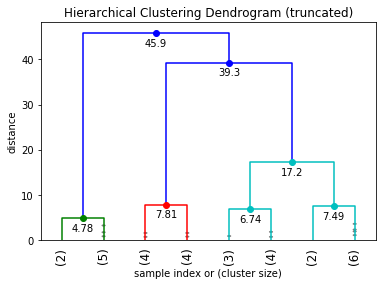

In [10]:
Z = linkage(X, 'ward')
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=8,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

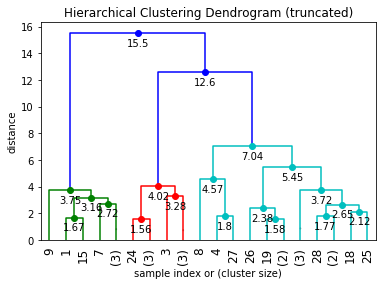

In [11]:
Z = linkage(X, 'average')
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=0.2,  # useful in small plots so annotations don't overlap
)
plt.show()

## Sklearn examples

In [12]:
# linkage = "ward"
# clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage).fit(X)
# lab = clustering.labels_
# colors = { 0:"seagreen", 1:'beige', 2:'yellow', 3:'grey', 
#            4:'pink', 5:'navy', 6:'orange', 7:'purple', 8:'salmon', 9:'olive', 10:'brown',
#            11:'tan', 12: 'plum', 13:'red', 14:'lightblue', 15:"khaki", 16:"gainsboro", 17:"peachpuff"}
# plt.figure(figsize=(14,4))
# for i in range(len(X)):
#     plt.scatter(X[i,0], X[i,1], color=colors[lab[i]], s=300)
# plt.show()

# CURE

The clustering algorithm starts with each input point as a separate cluster, and at each successive step merges the closest pair of clusters. In order to compute the distance between a pair of clusters, for each cluster, $c$ representative points are stored. These are determined by first choosing $c$ well scattered points within the cluster, and then shrinking them toward the mean of the cluster by a fraction $\alpha$. 
The distance between two clusters is then the distance between the closest pair of representative points - one belonging to each of the two clusters. Thus, only the representative points of a cluster are used to compute its distance from other clusters.

The $c$ representative points attempt to capture the physical shape and geometry of the cluster. Furthermore, shrinking the scattered points toward the mean by a factor $c$ gets rid of surface abnormalities and mitigates the effects of outliers. The reason for this is that outliers typically will be further away from the cluster center, and as a result, the shrinking would cause outliers to move more toward the center while the remaining representative points would experience minimal shifts. The larger movements in the outliers would thus reduce their ability to cause the wrong clusters to be merged. The parameter $\alpha$ can also be used to control the shapes of clusters. A smaller value of $\alpha$ shrinks the scattered points very little and thus favors elongated clusters. On the other hand, with larger values of $\alpha$, the scattered points get located closer to the mean, and clusters tend to be more compact.

The HEAP update phase is not optimized in this version of the algorithm, see the paper to know more about optimization details.


Choose $\textit{cure_sample_part}$ for the optimized version for larger datasets.


In this version, outliers are not taken into consideration; see the paper to know how to handle outliers.

In [13]:
from clustviz.cure import cure, plot_results_cure, cure_sample_part, Chernoff_Bounds, demo_parameters
#clusters, rep, mat_a= cure(X, 3, c=4, alpha=0.6)

In [15]:
#clusters, rep, mat_a = cure(X,3, c=4, alpha=0.5, plotting=True)

In [10]:
#clusters, rep, mat_a = cure(varied,3, c=7, alpha=0.85, plotting=False)

In [11]:
#plot_results_cure(clusters)

In [14]:
#cure_sample_part(X,c=3, alpha=0.1, k=3)

In [14]:
k=5
Chernoff_Bounds(u_min=round(len(X) / k), f=0.00001, N=len(X), k=k, d=0.05) 

If the sample size is 30, the probability of selecting fewer than 0 points from any one of the clusters is less than 0.25


29.957922732535692

In [13]:
#pd.DataFrame(X).sample(25)

In [10]:
#demo_parameters()

# BIRCH

Look at paper and PP presentation: Balanced Iterative Reducing and Clustering using Hierarchies.
It consists of a preprocessing phase that stores the input data into a CF-tree, whose leaves are then analyzed by a clustering algorithm (not necessarily hierarchical) to derive the clustering of the data. It is useful for large datasets, and it runs in O(n) time-complexity, but the order of input data as well as the non-spherical shape of clusters may compromise its effectiveness.

In order to plot all the steps, the following has been modified:

Pyclustering cluster/birch.py:
- many "prints" have been inserted
- plot_tree_fin and plot_birch_leaves have been inserted into "insert_data" method of the birch class, adding the argument "plotting"
  to both process and insert_data functions
- return_tree method has been added
    

In [4]:
from clustviz.birch.birch import birch, plot_birch_leaves, plot_tree_fin

from clustviz.birch.cftree import measurement_type
from pyclustering.cluster import cluster_visualizer

In [5]:
measurement_type.CENTROID_EUCLIDEAN_DISTANCE.value

0

In [ ]:
birch_instance = birch(X.tolist(), 3, initial_diameter=4, max_node_entries=5,
                       type_measurement=measurement_type.CENTROID_EUCLIDEAN_DISTANCE)

birch_instance.process(plotting=True)

In [8]:
#plot_tree_fin(birch_instance.return_tree(), info=True)

In [10]:
#plot_birch_leaves(birch_instance.return_tree(), X)

In [16]:
#birch_instance.return_tree().show_feature_distribution()

In [17]:
# clusters = birch_instance.get_clusters()
# # Visualize allocated clusters
# visualizer = cluster_visualizer()
# visualizer.append_clusters(clusters, X.tolist())
# visualizer.show()

# PAM

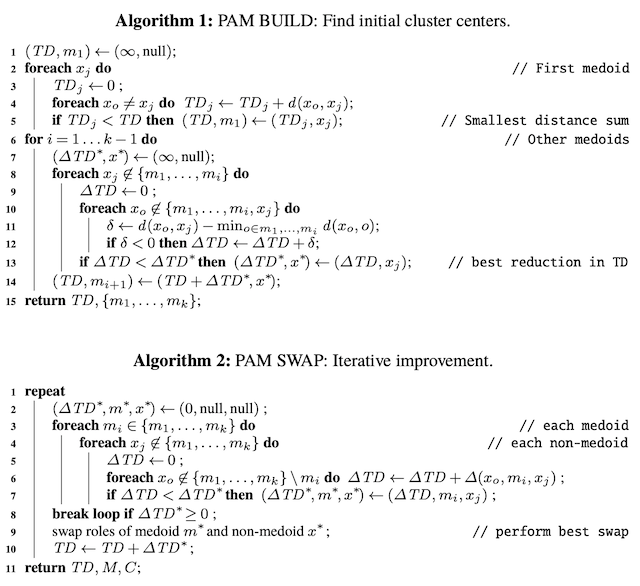

In [12]:
# from clustviz.pam import KMedoids

# X = make_blobs(n_samples=100,
#                             cluster_std=[2., 2., 2.],
#                             random_state=42)[0]
# z = KMedoids(n_cluster=3, tol=0.01)
# z.fit(X.tolist())

# CLARA

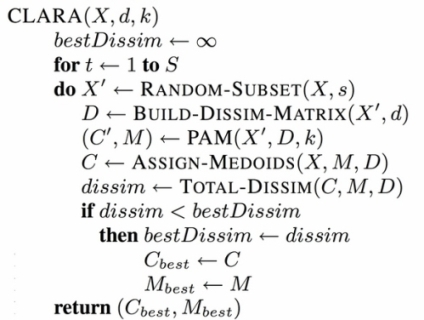

In [16]:
#beware that input data dimension must be at least 40+2*n_clusters, otherwise it is useless
X = make_blobs(n_samples=250,
                             cluster_std=[2, 4, 2],
                             random_state=42)[0]

In [ ]:
from clustviz.clara import ClaraClustering
#Clara = ClaraClustering()
#final_result = Clara.clara(pd.DataFrame(X), 2, 'fast_euclidean')

# CLARANS

$G_{n,k}$ is a tree where each node is a combination of $k$ points of the input dataset, so a possible set of medoids. Every node is linked only to nodes that differ only by one element, so every node has $k(n-k)$ neighbors; so, a neighbor of a node is a set of medoids where a single medoid is different. For each node one can compute the total cost associated to the corresponding configuration.
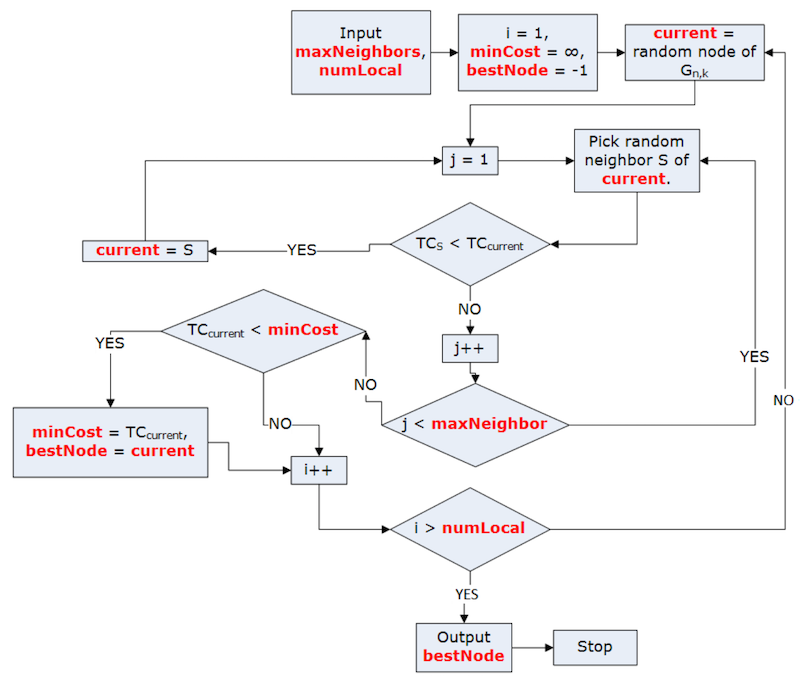

The algorithm requires numlocal (amount of iterations to solve the problem), maxneighbor (the maximum number of neighbors examined) and number of clusters to be formed ($k$) as input.

Then the iteration starts, $i$ is set to 1, before which the Mincost (which is the optimal cost) is set to $\infty$ and bestnode (optimal medoids) is set to empty tuple.

Now $k$ random data points are selected as current medoids and clusters are formed using these data points (Euclidean distance can be used to find the nearest medoid to form clusters).

After this a new loop starts, where $j$ is set to $1$. A random current medoid is selected and a random candidate (random neighbor) datapoint is selected for replacement with current medoid. If the replacement of candidate datapoint yields a lower TotalCost (which is the summation of distances between all the points in the clusters with their respective medoids ) than the current medoid then the replacement takes place. If replacement takes place then $j$ is not incremented,  otherwise $j = j + 1$.

Once $j$ > maxneighbor, then the current medoids are taken and their TotalCost is compared with the Mincost. If the TotalCost is less then the Mincost, then the Bestnode is updated with the current medoids.

$i$ is incremented afterwards and if $i$ is greater than numlocal, then the Bestnode is produced as output, otherwise the whole process is repeated.

In order to plot all the steps, the following has been modified:

Pyclustering cluster/clarans.py:

- many "prints" have been inserted
- plot_pam function has been inserted, and the process method has been modified with an addition of the parameter "plotting"


In [19]:
from clustviz.clarans import clarans, plot_tree_clarans

In [24]:
#plot_tree_clarans(pd.DataFrame(X[6:10]),2)

In [22]:
#z = clarans(X, 3, 3, 12).process(plotting=True)

In [20]:
#z.get_clusters()

# CHAMELEON & CHAMELEON2

## CHAMELEON 

Combines initial partition of data with hierarchical clustering techniques; it modifies clusters dynamically

Step1:

- Generate a KNN graph
- because it's local, it reduces influence of noise and outliers
- provides automatic adjustment for densities


Step2:

- use METIS: a graph partitioning algorithm
- get equally-sized groups of well-connected vertices
- this produces "sub-clusters" - something that is a part of true clusters


Step3:

- recombine sub-clusters
- combine two clusters if they are relatively close and they are relatively interconnected 
- so they are merged only if the new cluster will be similar to the original ones
  i.e. when "self-similarity" is preserved (similar to the join operation in Scatter/Gather)


But

- Curse of Dimensionality makes similarity functions behave poorly
- distances become more uniform as dimensionality grows
- similarity between two point of high dimensionality can be misleading
- often points may be similar even though they should belong to different clusters 

In [ ]:
from clustviz.chameleon.visualization import plot2d_data
from clustviz.chameleon.chameleon import cluster

#k = n_clusters, knn = number of nearest neighbors, m = n_clusters to reach in the initial clustering phase, 
#alpha = exponent of relative closeness

df = pd.DataFrame(X1)

res, h = cluster(df, k=1, knn=15, m=10, alpha=2, plot=True)

# draws a 2-D scatter plot with clusters
print("FINAL")
plot2d_data(res)

## CHAMELEON2

The differences from the standard Chameleon algorithm lie in the use of a symmetrical KNN-graph, in the FLOOD-FILLING phase, and in the modifications regarding $R_{IC}$ and $R_{CL}$, and in an automated procedure to choose the optimal number of clusters. Here we use Hmetis to partition the graph; in the official paper the Fiduccia-Mattheyses bisection algorithm was used instead.

In [ ]:
from clustviz.chameleon.visualization import plot2d_data
from clustviz.chameleon.chameleon2 import cluster2


#df = pd.DataFrame(varied)
df = pd.DataFrame(X)

#according to the paper, standard number of partitions
num_part = int(round(len(df) / max(5, round(len(df)/100))))
print(num_part)

res, h = cluster2(df, k=3, knn=14, m=9, alpha=2, beta=1, m_fact=1000, plot=True, auto_extract=True)

# draws a 2-D scatter plot with clusters
print("\n")
print("FINAL")
plot2d_data(res)

# DENCLUE

In [16]:
from clustviz.denclue import DENCLUE, plot_3d_or_contour, plot_3d_both, plot_grid_rect, plot_infl

In [22]:
#plot_3d_or_contour(varied, s=0.75, three=True, scatter=True, prec=10)

In [20]:
#plot_3d_or_contour(varied, s=1.5, three=False, scatter=True, prec=10)

In [8]:
#plot_3d_or_contour(varied, s=2, three=False, scatter=True, prec=12)

In [23]:
#plot_infl(varied, s=1, xi=3)

In [25]:
#plot_3d_both(data=varied, s=2, xi=3, prec=10)

In [23]:
#plot_grid_rect(varied, s=2, cube_kind="highly_populated")

In [7]:
#lab = DENCLUE(data=X, s=0.5, xi=2, xi_c=3, tol=2, prec=5, plotting=True)